# **Analisis Association Rule (Market Basket Analysis) Penjualan Busana Muslim Menggunakan Metode FP-Growth**

**Analisis Association Rule (Market Basket Analysis) Penjualan Busana Muslim Menggunakan Metode FP-Growth**

**Pendahuluan**

Analisis Association Rule, juga dikenal sebagai Market Basket Analysis, adalah teknik penting dalam data mining yang digunakan untuk mengidentifikasi pola hubungan antara item dalam dataset transaksi. Dalam konteks penjualan busana muslim, analisis ini memungkinkan kita untuk memahami pola pembelian konsumen, mengidentifikasi item yang sering dibeli bersama, dan menghasilkan rekomendasi produk yang lebih efektif.

Dalam proyek ini, kami menggunakan metode FP-Growth untuk melakukan analisis asosiasi terhadap dataset penjualan busana muslim. FP-Growth adalah algoritma yang efisien dalam menemukan itemset yang sering muncul bersama dalam dataset transaksi besar.

**Tujuan Analisis**

Tujuan dari analisis ini adalah untuk:
1. Mengidentifikasi pola pembelian konsumen yang dapat membantu dalam merumuskan strategi pemasaran yang lebih efektif.
2. Menemukan item-item yang sering dibeli bersama untuk mendukung pengambilan keputusan produk dan penyusunan penawaran bundel.
3. Memberikan wawasan yang berharga kepada pemilik toko busana muslim untuk meningkatkan penjualan dan kepuasan pelanggan.

Dengan menggunakan metode FP-Growth, kami akan menghasilkan aturan asosiasi yang mencerminkan hubungan antara item-item dalam penjualan busana muslim. Aturan-aturan ini akan memberikan pandangan yang dalam tentang preferensi pembelian konsumen, dan dapat membantu pemilik toko dalam membuat keputusan yang lebih baik dalam mengelola bisnis mereka.

## **Import Library**

In [ ]:
import pandas as pd  # Import library Pandas untuk manipulasi data
import re  # Import library re (regular expression) untuk operasi pencocokan pola
from mlxtend.frequent_patterns import fpgrowth  # Import fungsi fpgrowth dari library mlxtend untuk FP-Growth
from mlxtend.frequent_patterns import association_rules  # Import fungsi association_rules dari library mlxtend untuk aturan asosiasi

# Library untuk visualisasi
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Import Data**

In [ ]:
# Membaca data dari file Excel
data = pd.read_excel("dataset.xlsx", 'Sheet2')  # Membaca file Excel dengan nama dataset.xlsx dan sheet 'Sheet2'

# Memilih hanya kolom 'Order ID' dan 'Detail Produk' dari dataset
data = data[['Order ID', 'Detail Produk']]  # Memilih kolom 'Order ID' dan 'Detail Produk'

# Menampilkan dataset yang telah dipilih kolomnya
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Detail Produk
0,#19141,Zayyan Dewasa Black L Black x 1\n Zayyan Dewas...
1,#19140,Latif 07 Pendek Abu L Abu x 1
2,#19139,Rairaka 06 Denim 10 Denim x 1\n Rairaka 06 Mat...
3,#19138,Kurta Ahnaf Anak Dark Grey XXS Dark Grey x 1
4,#19137,Kurta Ahnaf Dewasa Black S Black x 1\n Kurta A...
...,...,...
3080,#15959,Shaka Dewasa Black M Black x 10\n Shaka Dewasa...
3081,#15958,Nurida Shaka Dewasa Magenta M MAGENTA x 1\n Nu...
3082,#15957,Nurida Shaka Dewasa Magenta XL MAGENTA x 1\n N...
3083,#15956,Shaka Dewasa Magenta M Magenta x 1


## **Preprocessing Data**

In [ ]:
# Pemisahan Detail Produk menjadi item-item terpisah
# Memisahkan setiap baris di kolom 'Detail Produk' berdasarkan baris baru ('\n')
data['Detail Produk'] = data['Detail Produk'].str.split('\n')

# Menghapus spasi ekstra atau karakter non-essential
# Menghapus spasi ekstra di awal dan akhir setiap item di setiap baris kolom 'Detail Produk'
data['Detail Produk'] = data['Detail Produk'].apply(lambda x: [item.strip() for item in x])

# Menghapus "x" dan angka yang mengikuti "x" dari setiap item dalam setiap transaksi
# Menghapus pola ' x ' diikuti oleh angka dari setiap item di setiap transaksi di kolom 'Detail Produk'
data['Detail Produk'] = [[re.sub(r' x \d+', '', item) for item in transaction] for transaction in data['Detail Produk']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Berikut adalah penjelasan untuk setiap baris kode:

1. `data['Detail Produk'] = data['Detail Produk'].str.split('\n')`: Baris ini membagi setiap baris dalam kolom 'Detail Produk' menjadi item-item terpisah, menggunakan baris baru sebagai pemisahnya. Hasilnya adalah setiap item dalam setiap transaksi menjadi elemen-elemen dalam sebuah list.

2. `data['Detail Produk'] = data['Detail Produk'].apply(lambda x: [item.strip() for item in x])`: Baris ini menghapus spasi ekstra di awal dan akhir setiap item dalam setiap transaksi. Ini dilakukan dengan menggunakan fungsi `strip()` untuk setiap item dalam setiap list, yang diterapkan ke setiap baris menggunakan fungsi `apply()`.

3. `data['Detail Produk'] = [[re.sub(r' x \d+', '', item) for item in transaction] for transaction in data['Detail Produk']]`: Baris ini menghapus pola ' x ' diikuti oleh angka dari setiap item dalam setiap transaksi. Ini dilakukan dengan menggunakan modul `re` untuk mencocokkan pola dan menggantinya dengan string kosong untuk setiap item dalam setiap transaksi. Loop dilakukan untuk setiap baris dalam kolom 'Detail Produk' menggunakan list comprehension.

In [ ]:
# Tampilkan hasil
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,Detail Produk
0,#19141,"[Zayyan Dewasa Black L Black, Zayyan Dewasa Br..."
1,#19140,[Latif 07 Pendek Abu L Abu]
2,#19139,"[Rairaka 06 Denim 10 Denim, Rairaka 06 Matcha ..."
3,#19138,[Kurta Ahnaf Anak Dark Grey XXS Dark Grey]
4,#19137,"[Kurta Ahnaf Dewasa Black S Black, Kurta Ahnaf..."
...,...,...
3080,#15959,"[Shaka Dewasa Black M Black, Shaka Dewasa Blac..."
3081,#15958,"[Nurida Shaka Dewasa Magenta M MAGENTA, Nurida..."
3082,#15957,"[Nurida Shaka Dewasa Magenta XL MAGENTA, Nurid..."
3083,#15956,[Shaka Dewasa Magenta M Magenta]


In [ ]:
data.to_excel("dataclean.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **One Hot Encoding**

In [ ]:
# Melakukan one-hot encoding terhadap kolom 'Detail Produk' berdasarkan 'Order ID'
one_hot_encoded = pd.get_dummies(data['Detail Produk'].explode()).groupby(level=0).max()

# Menggabungkan hasil one-hot encoding dengan kolom 'Order ID'
encoded_data = pd.concat([data['Order ID'], one_hot_encoded], axis=1)

# Menampilkan dataset yang telah di one-hot encoding
encoded_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Order ID,A04 HIJAU TUA ANAK L,A04 HIJAU TUA ANAK S,A04 MERBAT ANAK L,A04 NAVY ANAK S,A04 SALEM ANAK L,Abaya Abu Dewasa L Abu,Abaya Abu Dewasa M Abu,Abaya Abu Dewasa S Abu,Abaya Abu Dewasa XL Abu,...,rairaka 03 coklat 6 cokelat,rairaka 03 coklat 8 cokelat,rairaka 03 kopsu 1 kopsu,rairaka 03 kopsu 4 kopsu,rairaka 03 kopsu 8 kopsu,rairaka 03 sage 1 sage,rairaka 03 sage 2 sage,rairaka 03 sage 4 sage,rairaka 03 sage 6 sage,rairaka 03 sage 8 sage
0,#19141,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,#19140,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,#19139,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#19138,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,#19137,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,#15959,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3081,#15958,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3082,#15957,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3083,#15956,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Berikut adalah penjelasan untuk setiap baris kode:

1. `one_hot_encoded = pd.get_dummies(data['Detail Produk'].explode()).groupby(level=0).max()`: Baris ini melakukan one-hot encoding terhadap kolom 'Detail Produk' berdasarkan 'Order ID'. Proses ini melibatkan beberapa langkah:
   - `data['Detail Produk'].explode()`: Ini mengubah setiap elemen dalam kolom 'Detail Produk', yang merupakan list dari item-item dalam setiap transaksi, menjadi baris terpisah. Sebagai contoh, jika sebuah transaksi memiliki 3 item, setelah explode, transaksi tersebut akan menjadi 3 baris terpisah.
   - `pd.get_dummies()`: Ini menghasilkan representasi one-hot encoding dari data yang telah diekspansi. Setiap item unik dalam semua transaksi akan menjadi kolom baru dalam DataFrame hasil, dengan nilai 1 yang menandakan keberadaan item tersebut dalam transaksi, dan nilai 0 untuk item yang tidak ada.
   - `groupby(level=0)`: Ini mengelompokkan hasil one-hot encoding berdasarkan indeks level 0, yaitu indeks awal sebelum dilakukan operasi explode.
   - `max()`: Ini menggabungkan kolom-kolom yang dihasilkan oleh one-hot encoding, sehingga jika suatu item muncul dalam satu transaksi, nilainya akan menjadi 1, dan jika tidak, nilainya akan menjadi 0.

2. `encoded_data = pd.concat([data['Order ID'], one_hot_encoded], axis=1)`: Baris ini menggabungkan hasil one-hot encoding dengan kolom 'Order ID'. Ini dilakukan dengan menggunakan fungsi `pd.concat()` untuk menggabungkan DataFrame 'Order ID' dengan DataFrame hasil one-hot encoding. Parameter `axis=1` menunjukkan bahwa penggabungan dilakukan secara horizontal, yaitu kolom demi kolom.

3. `encoded_data`: Ini adalah perintah untuk menampilkan dataset yang telah di one-hot encoding.

Jadi, keseluruhan kode ini menghasilkan dataset baru yang diencode secara one-hot, di mana setiap item dalam setiap transaksi direpresentasikan sebagai kolom dengan nilai 1 atau 0, dengan 'Order ID' sebagai identifikasi untuk setiap transaksi.

## **Analisis Asosiasi Menggunakan Algoritma FP-Growth**

In [ ]:
# Drop kolom 'Order ID' untuk mempersiapkan dataset untuk FP-Growth
transactions = encoded_data.drop('Order ID', axis=1)

# Membangun model FP-Growth
frequent_itemsets = fpgrowth(transactions, min_support=0.009, use_colnames=True)

# Mengurutkan frequent itemsets berdasarkan support dari yang terbesar ke yang terkecil
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Menampilkan frequent itemsets yang telah diurutkan
frequent_itemsets_sorted


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
26,0.016532,(B07 NAVY ANAK S)
0,0.016207,(Kurta Ahnaf Dewasa Black L Black)
69,0.016207,(Akmal Anak Putih Pendek L Putih)
2,0.015883,(Azmi Dewasa Magenta L Magenta)
9,0.015559,(Akmal Anak Putih Pendek XL Putih)
...,...,...
1,0.009076,(Kurta Ahnaf Dewasa Black S Black)
52,0.009076,(Azmi Anak Hitam M Hitam)
58,0.009076,(Hasbi Anak Merah Misty M Merah Misty)
87,0.009076,(Akmal Dewasa Putih Panjang XL Putih)


Bagian ini adalah tahap analisis asosiasi menggunakan algoritma FP-Growth setelah data selesai dipreprocessing. Berikut adalah penjelasan untuk setiap baris kode:

1. **Drop kolom 'Order ID'**:
   - `transactions = encoded_data.drop('Order ID', axis=1)`: Baris ini menghapus kolom 'Order ID' dari dataset yang telah dipreprocessing. Algoritma FP-Growth memerlukan dataset yang hanya berisi item-item yang dibeli dalam setiap transaksi, tanpa informasi tambahan seperti ID transaksi.

2. **Membangun model FP-Growth**:
   - `frequent_itemsets = fpgrowth(transactions, min_support=0.009, use_colnames=True)`: Baris ini membangun model FP-Growth menggunakan dataset yang telah dipersiapkan. Fungsi `fpgrowth()` menerima dataset transaksi dan parameter `min_support` yang menentukan support minimum yang diperlukan untuk suatu itemset agar dianggap sering muncul. Parameter `use_colnames=True` mengindikasikan bahwa nama item harus diambil dari nama kolom dalam dataset.

3. **Tampilkan itemset yang sering muncul bersama**:
   - `frequent_itemsets`: Baris ini menampilkan itemset yang sering muncul bersama dengan frekuensi support-nya. Hasilnya adalah DataFrame yang berisi itemset-itemset yang sering muncul bersama, diurutkan berdasarkan nilai support dari yang tertinggi. Setiap baris mewakili satu itemset dengan kolom-kolom yang menunjukkan item-item yang termasuk dalam itemset tersebut.

### **Notes**
Support adalah ukuran seberapa sering suatu itemset muncul dalam semua transaksi dalam dataset. Secara matematis, support dari suatu itemset \( X \) dihitung sebagai proporsi dari transaksi yang mengandung itemset tersebut terhadap total transaksi.

Rumus untuk menghitung support dari suatu itemset \( X \) adalah sebagai berikut:


$$ \text{Support}(X) = \frac{\text{Jumlah Transaksi yang Mengandung } X}{\text{Total Transaksi}} $$



Di sini, "Jumlah Transaksi yang Mengandung \( X \)" adalah jumlah transaksi di mana seluruh item dalam itemset \( X \) hadir, sementara "Total Transaksi" adalah jumlah keseluruhan transaksi dalam dataset.

Dalam konteks analisis asosiasi, support digunakan untuk menentukan seberapa umum suatu itemset dalam dataset. Itemset dengan support yang tinggi cenderung lebih signifikan dalam analisis asosiasi karena lebih sering muncul bersama dengan item lain.

## **Visualisasi Item Support**

In [ ]:
# Mengonversi set itemsets menjadi string untuk Plotly
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Mengurutkan DataFrame berdasarkan support
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Membuat bar chart dengan Plotly
fig = go.Figure([go.Bar(x=frequent_itemsets_sorted['itemsets_str'], y=frequent_itemsets_sorted['support'])])

# Menambahkan judul dan label sumbu
fig.update_layout(
    title='Frequent Itemsets Support Visualization',
    xaxis=dict(title='Itemset'),
    yaxis=dict(title='Support')
)

# Menampilkan plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Temukan Aturan Asosiasi dengan Minimum Confidence Tertentu**

In [ ]:
# Temukan aturan asosiasi dengan minimum confidence tertentu
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=False)

# Mengurutkan aturan asosiasi berdasarkan confidence dari yang terbesar ke yang terkecil
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Menampilkan aturan asosiasi yang telah diurutkan
rules_sorted


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(Azmi Anak Army L Army),(Azmi Dewasa Army L Army),0.010373,0.014911,0.009724,0.937500,62.873641,0.009570,15.761426,0.994410
14,(Azmi Anak Magenta L Magenta),(Azmi Dewasa Magenta XL Magenta),0.010049,0.013290,0.009400,0.935484,70.389457,0.009267,15.294003,0.995800
19,(Azmi Anak Army M Army),(Azmi Dewasa Army L Army),0.010049,0.014911,0.009076,0.903226,60.575035,0.008926,10.179254,0.993475
8,(Hasbi Anak Biru Misty L Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.010373,0.015559,0.009076,0.875000,56.236979,0.008915,7.875527,0.992513
26,(Hasbi Anak Biru Misty M Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.010373,0.015559,0.009076,0.875000,56.236979,0.008915,7.875527,0.992513
4,(Hasbi Dewasa Biru Misty XL Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.011345,0.015559,0.009724,0.857143,55.089286,0.009548,6.891086,0.993115
7,(Azmi Dewasa Navy XL Navy),(Azmi Dewasa Navy L Navy),0.011021,0.014911,0.009400,0.852941,57.202685,0.009236,6.698606,0.993467
21,(Hasbi Anak Coklat Misty M Coklat Misty),(Hasbi Dewasa Coklat Misty L Coklat Misty),0.011345,0.012966,0.009400,0.828571,63.903571,0.009253,5.757699,0.995647
16,(Hasbi Dewasa Coklat Misty XL Coklat Misty),(Hasbi Dewasa Coklat Misty L Coklat Misty),0.012318,0.012966,0.010049,0.815789,62.917763,0.009889,5.358185,0.996379
10,(Hasbi Dewasa Biru Misty M Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.012318,0.015559,0.010049,0.815789,52.431469,0.009857,5.344107,0.993161


In [ ]:
rules_sorted.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,(Azmi Anak Army L Army),(Azmi Dewasa Army L Army),0.010373,0.014911,0.009724,0.937500,62.873641,0.009570,15.761426,0.994410
14,(Azmi Anak Magenta L Magenta),(Azmi Dewasa Magenta XL Magenta),0.010049,0.013290,0.009400,0.935484,70.389457,0.009267,15.294003,0.995800
19,(Azmi Anak Army M Army),(Azmi Dewasa Army L Army),0.010049,0.014911,0.009076,0.903226,60.575035,0.008926,10.179254,0.993475
8,(Hasbi Anak Biru Misty L Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.010373,0.015559,0.009076,0.875000,56.236979,0.008915,7.875527,0.992513
26,(Hasbi Anak Biru Misty M Biru Misty),(Hasbi Dewasa Biru Misty L Biru Misty),0.010373,0.015559,0.009076,0.875000,56.236979,0.008915,7.875527,0.992513


In [ ]:
# Export hasil association rule
rules_sorted.to_excel("hasil association rules.xlsx", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### **Visualisasi Heatmap Association Rule**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



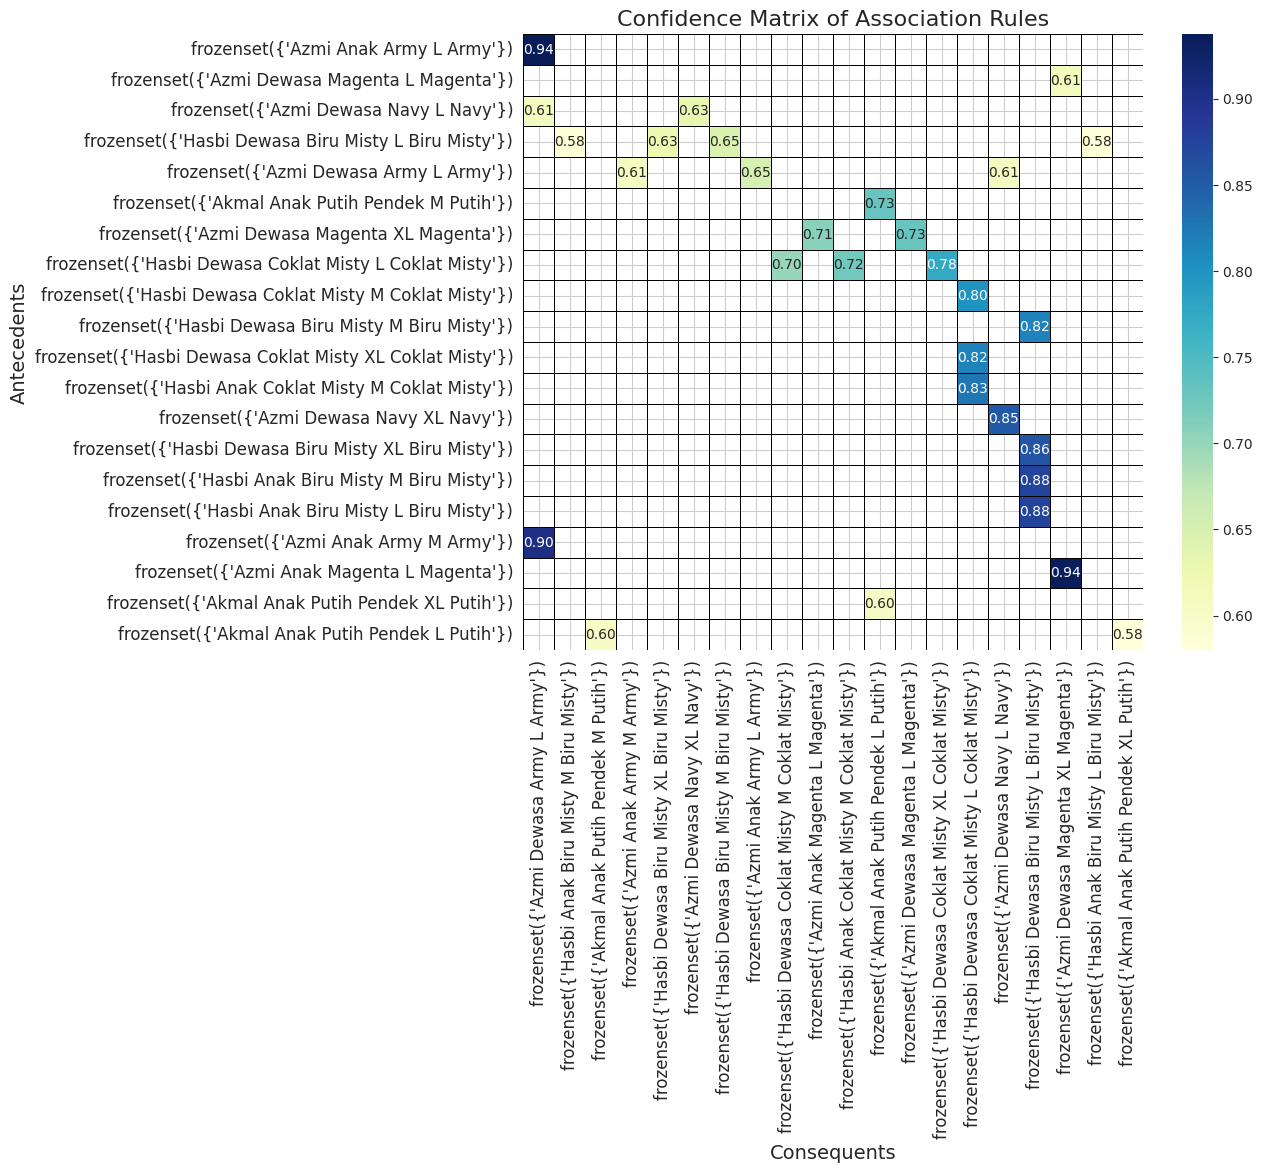

In [ ]:
# Membuat matriks confidence antara item-item yang berpasangan dalam aturan asosiasi
confidence_matrix = rules_sorted.pivot(index='antecedents', columns='consequents', values='confidence')

# Mengatur gaya plot
sns.set_style("whitegrid")

# Menggambar heatmap dengan palet warna yang lebih menarik
plt.figure(figsize=(10, 8))
sns.heatmap(confidence_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black', fmt=".2f")
plt.title('Confidence Matrix of Association Rules', fontsize=16)
plt.xlabel('Consequents', fontsize=14)
plt.ylabel('Antecedents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Bagian ini adalah tahap menemukan aturan asosiasi dengan menggunakan hasil dari FP-Growth. Berikut adalah penjelasan singkat untuk setiap baris kode:

1. **Temukan aturan asosiasi dengan minimum confidence tertentu**:
   - `rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=False)`: Baris ini digunakan untuk menemukan aturan asosiasi dari itemset yang telah dihasilkan sebelumnya dengan menggunakan fungsi `association_rules()`. Parameter `metric="confidence"` menentukan bahwa kita ingin menggunakan confidence sebagai metrik untuk mengevaluasi aturan asosiasi. Parameter `min_threshold=False` menunjukkan bahwa kita tidak menetapkan nilai minimum untuk confidence.

2. **Tampilkan aturan asosiasi**:
   - `rules`: Baris ini digunakan untuk menampilkan hasil aturan asosiasi yang telah ditemukan. Hasilnya adalah DataFrame yang berisi aturan-aturan asosiasi, diurutkan berdasarkan metrik yang digunakan (dalam hal ini, confidence). Setiap baris mewakili satu aturan asosiasi dengan kolom-kolom yang menyediakan informasi tentang antecedents, consequents, support, confidence, lift, dan beberapa metrik lainnya.

### **Notes**

Confidence adalah ukuran seberapa sering aturan asosiasi terbukti benar dalam transaksi. Ini mengukur seberapa besar probabilitas bahwa ketika satu set item (antecedents) dibeli, item lain (consequents) juga akan dibeli.

Rumus untuk menghitung confidence dari aturan asosiasi \( X \rightarrow Y \) adalah sebagai berikut:

$$[
\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)}
]$$

Di sini, \( X \) adalah antecedents dan \( Y \) adalah consequents dari aturan asosiasi. Support \( X \cup Y \) adalah proporsi dari transaksi yang mengandung baik \( X \) maupun \( Y \), sementara Support \( X \) adalah proporsi dari transaksi yang mengandung \( X \).

Dengan kata lain, confidence dari aturan \( X \rightarrow Y \) mengukur seberapa sering \( Y \) dibeli ketika \( X \) juga dibeli. Semakin tinggi nilai confidence, semakin kuat hubungan antara \( X \) dan \( Y \) dalam dataset transaksi.

## **CARA MEMBACA HASIL ASOSIASI**

Hasil di atas adalah contoh dari dua aturan asosiasi yang ditemukan setelah analisis menggunakan FP-Growth dan mengaplikasikan minimum confidence tertentu. Berikut adalah cara membaca dan menafsirkan hasil tersebut:

1. **Antecedents dan Consequents**:
   - **Antecedents**: Merupakan kumpulan item atau itemset pada sisi kiri dari aturan asosiasi.
   - **Consequents**: Merupakan kumpulan item atau itemset pada sisi kanan dari aturan asosiasi.

2. **Antecedent Support dan Consequent Support**:
   - **Antecedent Support**: Merupakan proporsi dari transaksi yang mengandung antecedents.
   - **Consequent Support**: Merupakan proporsi dari transaksi yang mengandung consequents.

3. **Support**:
   - Merupakan proporsi dari transaksi yang mengandung baik antecedents maupun consequents.

4. **Confidence**:
   - Merupakan probabilitas bahwa pembelian consequents terjadi ketika antecedents juga dibeli.
   - Dalam contoh di atas, confidence adalah sekitar 58% atau 60%, menunjukkan bahwa ada sekitar 58% atau 60% transaksi yang membeli consequents juga membeli antecedents.

5. **Lift**:
   - Merupakan ukuran seberapa besar kenaikan dalam kemungkinan pembelian consequents ketika antecedents dibeli, dibandingkan dengan kemungkinan pembelian consequents secara acak.
   - Dalam contoh di atas, lift adalah sekitar 37, menunjukkan bahwa pembelian consequents 37 kali lebih mungkin terjadi ketika antecedents juga dibeli daripada ketika tidak.

6. **Leverage**:
   - Merupakan ukuran seberapa banyak frekuensi pengamatan yang berbeda dari yang diharapkan jika antecedents dan consequents bersifat independen.
   - Dalam contoh di atas, leverage adalah sekitar 0.009, menunjukkan bahwa pembelian bersama antecedents dan consequents hanya 0.009 kali lebih banyak daripada yang diharapkan jika keduanya bersifat independen.

7. **Conviction**:
   - Merupakan ukuran seberapa bergantungnya consequents pada antecedents.
   - Dalam contoh di atas, conviction adalah sekitar 2.34 atau 2.48, menunjukkan bahwa consequents 2.34 atau 2.48 kali lebih mungkin terjadi ketika antecedents juga dibeli daripada ketika tidak.

8. **Zhang's Metric**:
   - Merupakan ukuran alternatif yang mencakup ketergantungan dan lift, dengan fokus pada korelasi antara antecedents dan consequents.

Dengan melihat nilai-nilai ini, kita dapat mengevaluasi kekuatan dan signifikansi dari setiap aturan asosiasi yang ditemukan dalam dataset. Dalam konteks bisnis atau analisis, hasil ini dapat digunakan untuk membuat rekomendasi produk, menyusun strategi pemasaran, atau memahami pola pembelian konsumen.

